In [88]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, date2num

In [3]:
#read in all 5 nyc files
nyc_2015 = pd.read_csv('../data/nyc2015.csv')
nyc_2016 = pd.read_csv('../data/nyc2016.csv')
nyc_2017 = pd.read_csv('../data/nyc2017.csv')
nyc_2018 = pd.read_csv('../data/nyc2018.csv')
nyc_2019 = pd.read_csv('../data/nyc2019.csv')

In [4]:
#add year column to each race
nyc_2015['year'] = '2015'
nyc_2016['year'] = '2016'
nyc_2017['year'] = '2017'
nyc_2018['year'] = '2018'
nyc_2019['year'] = '2019'

In [5]:
#confirming first 10k per year
print(nyc_2015.shape)
print(nyc_2016.shape)
print(nyc_2017.shape)
print(nyc_2018.shape)
print(nyc_2019.shape)

(10000, 21)
(10000, 21)
(10000, 21)
(10000, 21)
(10000, 21)


In [6]:
#understanding fields in data
nyc_2016.loc[3034]

Unnamed: 0                        3034
runnerId                      19788849
firstName                       Nicole
lastName                     Muldowney
bib                               6244
age                                 26
birthdate          1990-06-13T00:00:00
gender                               F
city                        Birmingham
countryCode                        USA
stateProvince                       AL
iaaf                               USA
overallPlace                      3035
overallTime                    3:22:04
pace                             07:43
genderPlace                        377
ageGradeTime                     22:04
ageGradePlace                      923
ageGradePercent                  67.02
racesCount                           2
year                              2016
Name: 3034, dtype: object

In [7]:
#concat all race files
nyc_races = pd.concat([nyc_2015, nyc_2016,nyc_2017,nyc_2018,nyc_2019], axis=0)

In [8]:
nyc_races.head()

,Unnamed: 0,runnerId,firstName,lastName,bib,age,birthdate,gender,city,countryCode,...,iaaf,overallPlace,overallTime,pace,genderPlace,ageGradeTime,ageGradePlace,ageGradePercent,racesCount,year
0,0,16619869,Stanley,Biwott,5,29,1986-04-21T00:00:00,M,Eldoret,KEN,...,KEN,1,2:10:34,04:59,1,10:34,2,94.18,2,2015
1,1,16654079,Geoffery,Kamworor,6,22,1992-11-22T00:00:00,M,Kapchorwa District,KEN,...,KEN,2,2:10:48,05:00,2,10:48,3,94.00,4,2015
2,2,16611443,Lelisa,Desisa,2,25,1990-01-14T00:00:00,M,Addis Ababa,ETH,...,ETH,3,2:12:10,05:03,3,12:10,4,93.03,5,2015
3,3,16616462,Wilson,Kipsang,1,33,1982-03-15T00:00:00,M,Iten,KEN,...,KEN,4,2:12:45,05:04,4,12:36,5,92.73,5,2015
4,4,16654080,Yemane,Tsegay,7,30,1985-04-08T00:00:00,M,Addis Ababa,ETH,...,ETH,5,2:13:24,05:06,5,13:24,6,92.18,1,2015


In [9]:
#remove/drop columns that are not needed: Unnamed: 0 for now (Maybe later: ageGradeTime, ageGradePlace, ageGradePercent,racesCount) 
nyc_races = nyc_races.drop(columns = ['Unnamed: 0','bib'], axis=1)
nyc_races.columns

Index(['runnerId', 'firstName', 'lastName', 'age', 'birthdate', 'gender',
       'city', 'countryCode', 'stateProvince', 'iaaf', 'overallPlace',
       'overallTime', 'pace', 'genderPlace', 'ageGradeTime', 'ageGradePlace',
       'ageGradePercent', 'racesCount', 'year'],
      dtype='object')

In [10]:
nyc_races.loc[nyc_races['runnerId'] == 19788849]

,runnerId,firstName,lastName,age,birthdate,gender,city,countryCode,stateProvince,iaaf,overallPlace,overallTime,pace,genderPlace,ageGradeTime,ageGradePlace,ageGradePercent,racesCount,year
3034,19788849,Nicole,Muldowney,26,1990-06-13T00:00:00,F,Birmingham,USA,AL,USA,3035,3:22:04,07:43,377,22:04,923,67.02,2,2016


Rename columns for readability and shorten names, combine first and last name to 'full_name'


In [11]:
nyc_races['full_name'] = nyc_races['firstName'] + ' ' + nyc_races['lastName']
nyc_races = nyc_races.rename(columns={'runnerId': 'id', 'birthdate': 'dob','countryCode': 'country',
                                      'stateProvince': 'state',
                                     'overallPlace': 'place','overallTime': 'time',
                                     'genderPlace': 'gender_place',
                                     'ageGradeTime': 'age_grade_time',
                                      'ageGradePlace': 'age_grade_place',
                                      'ageGradePercent': 'age_grade_percent',
                                      'racesCount': 'nyrr_races'})

Add full name and year columns to left positions, drop first and last name columns

In [12]:
nyc_races.insert(1, 'full_name', nyc_races.pop('full_name'))
nyc_races.insert(2,'year',nyc_races.pop('year'))
nyc_races = nyc_races.drop(columns = ['firstName','lastName'],axis=1)

create age bins/buckets

In [348]:
nyc_races['age_group'] = pd.cut(x=nyc_races['age'],
                          bins=[10, 19, 29, 39, 49, 59, 69, 79, 89], 
                          labels=['10-19','20-29', '30-39', '40-49','50-59','60-69','70-79','80-89'])


In [349]:
nyc_races.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 50000 non-null  int64   
 1   full_name          50000 non-null  object  
 2   year               50000 non-null  object  
 3   age                50000 non-null  int64   
 4   dob                49999 non-null  object  
 5   gender             50000 non-null  object  
 6   city               49989 non-null  object  
 7   country            50000 non-null  object  
 8   state              27040 non-null  object  
 9   place              50000 non-null  int64   
 10  time               50000 non-null  int64   
 11  pace               50000 non-null  object  
 12  age_grade_time     50000 non-null  object  
 13  age_grade_place    50000 non-null  int64   
 14  age_grade_percent  50000 non-null  float64 
 15  nyrr_races         50000 non-null  int64   
 16  age_g

Change time to timedelta from object, remove dob time portion

In [350]:
nyc_races['time'] = pd.to_timedelta(nyc_races['time'])
nyc_races['dob'] = nyc_races['dob'].str.rstrip('T00:00:00')

Export clean combined results to csv - do not need to run this again

In [351]:
#nyc_races.to_csv('../data/clean_nyc.csv')

In [352]:
nyc_races['country'].value_counts() #135 countries

USA    27049
ITA     2797
FRA     2488
GBR     2044
ESP     1580
       ...  
ERI        1
VCT        1
TCD        1
VUT        1
EGY        1
Name: country, Length: 135, dtype: int64

In [353]:
year_country_counts = nyc_races.groupby(['year']).country.value_counts()
year_country_counts

year  country
2015  USA        5368
      FRA         574
      ITA         507
      GBR         365
      ESP         309
                 ... 
2019  TGO           1
      TTO           1
      VNM           1
      VUT           1
      ZWE           1
Name: country, Length: 466, dtype: int64

In [ ]:
#remove iaaf, gender_place columns
nyc_races = nyc_races.drop(columns = ['iaaf','gender_place'],axis=1)

In [355]:
nyc_races.head()

,id,full_name,year,age,dob,gender,city,country,state,place,time,pace,age_grade_time,age_grade_place,age_grade_percent,nyrr_races,age_group
0,16619869,Stanley Biwott,2015,29,1986-04-21,M,Eldoret,KEN,NaN,1,02:10:34,04:59,10:34,2,94.18,2,20-29
1,16654079,Geoffery Kamworor,2015,22,1992-11-22,M,Kapchorwa District,KEN,NaN,2,02:10:48,05:00,10:48,3,94.00,4,20-29
2,16611443,Lelisa Desisa,2015,25,1990-01-14,M,Addis Ababa,ETH,NaN,3,02:12:10,05:03,12:10,4,93.03,5,20-29
3,16616462,Wilson Kipsang,2015,33,1982-03-15,M,Iten,KEN,NaN,4,02:12:45,05:04,12:36,5,92.73,5,30-39
4,16654080,Yemane Tsegay,2015,30,1985-04-08,M,Addis Ababa,ETH,NaN,5,02:13:24,05:06,13:24,6,92.18,1,30-39


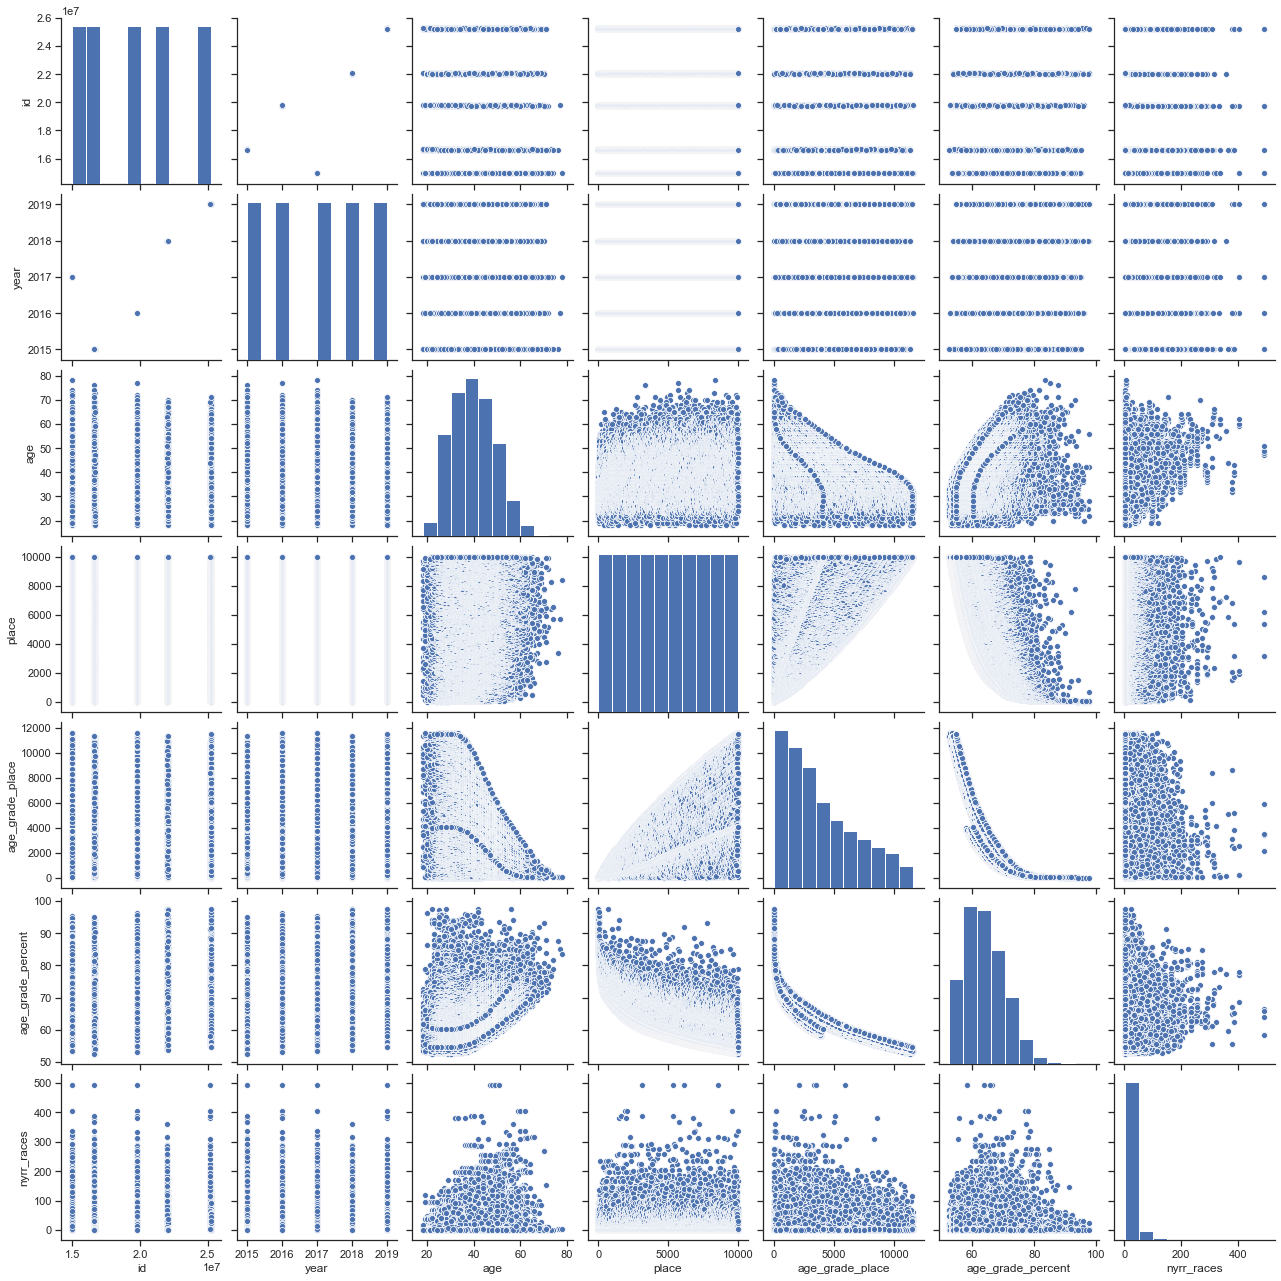

In [356]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(nyc_races)

# Age Grading eda
https://www.runnersworld.com/advanced/a20794116/a-guide-to-age-grading/

In [357]:
nyc_races['age_grade_percent'].describe()

count    50000.000000
mean        64.228865
std          6.600073
min         52.590000
25%         59.270000
50%         63.370000
75%         68.500000
max         97.600000
Name: age_grade_percent, dtype: float64

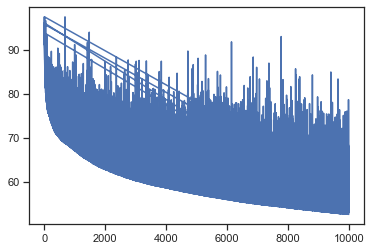

In [358]:
nyc_races['age_grade_percent'].plot();

# Group by Gender - Female vs Male comparison

In [359]:
nyc_gender_counts = nyc_races.groupby(['year']).gender.value_counts()
nyc_gender_counts

year  gender
2015  M         7706
      F         2294
2016  M         7852
      F         2148
2017  M         7930
      F         2070
2018  M         7836
      F         2164
2019  M         7791
      F         2209
Name: gender, dtype: int64

In [360]:
nyc_gender_counts = nyc_gender_counts.to_frame()
nyc_gender_counts

gender
year gender        
2015 M         7706
     F         2294
2016 M         7852
     F         2148
2017 M         7930
     F         2070
2018 M         7836
     F         2164
2019 M         7791
     F         2209

Note: multi-index dataframe works best to .unstack to plot below

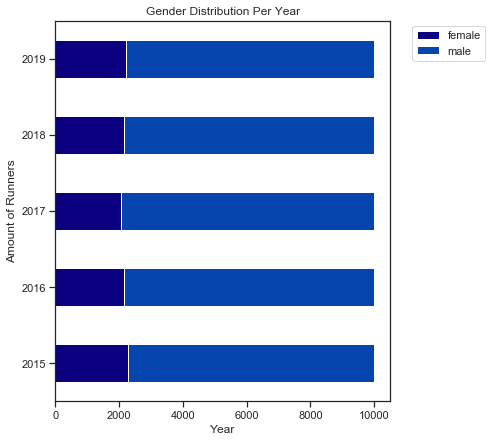

In [361]:
#WANT TO possibly use percentages as well to display above
colors = {'#0645ad', '#0b0080'} #e5e5e5'
nyc_gender_counts.unstack(level=1).plot(kind='barh',figsize = (6,7), stacked = True, subplots=False, color = colors)
ssfont = {'fontname':'sans-serif'}

L=plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
L.get_texts()[1].set_text('male')
L.get_texts()[0].set_text('female')

plt.ylabel('Amount of Runners')
plt.xlabel('Year')
plt.title('Gender Distribution Per Year',**ssfont);
#plt.savefig('genderdist.png')          


# Group by Gender per year - Average Finish Times

Need to convert time to an integer when grouping by year/gender in order to get the average > then convert to timedelta

In [362]:
nyc_races['time'] = nyc_races['time'].astype('int64') #or can call np.int64
nyc_groupby_gender = nyc_races.groupby(['year','gender']).time.mean().astype('timedelta64[ns]').to_frame().reset_index()#.astype(np.int64).mean()
nyc_groupby_gender

,year,gender,time
0,2015,F,03:36:59.981255
1,2015,M,03:28:57.110692
2,2016,F,03:34:29.166201
3,2016,M,03:27:21.895822
4,2017,F,03:32:37.985990
5,2017,M,03:25:26.733543
6,2018,F,03:30:46.949168
7,2018,M,03:23:02.761995
8,2019,F,03:27:32.916251
9,2019,M,03:19:13.344628


separate out female and male into dataframes to plot

In [363]:
nyc_groupby_gender_female = nyc_groupby_gender.loc[(nyc_groupby_gender['gender'] == 'F')].reset_index()
nyc_groupby_gender_male = nyc_groupby_gender.loc[(nyc_groupby_gender['gender'] == 'M')].reset_index()

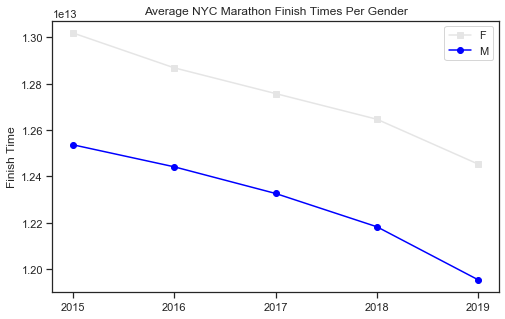

In [364]:
#times not displaying correctly here - see correct graph below
fig= plt.figure(figsize=(8,5))
plt.plot(nyc_groupby_gender_female['year'],nyc_groupby_gender_female['time'],color='#e5e5e5',label='F',marker='s')
plt.plot(nyc_groupby_gender_male['year'],nyc_groupby_gender_male['time'],color='blue',label='M',marker='o')
plt.title('Average NYC Marathon Finish Times Per Gender', fontdict=None, loc='center')
plt.ylabel('Finish Time')
plt.legend();

Need to convert to datetime and then set format

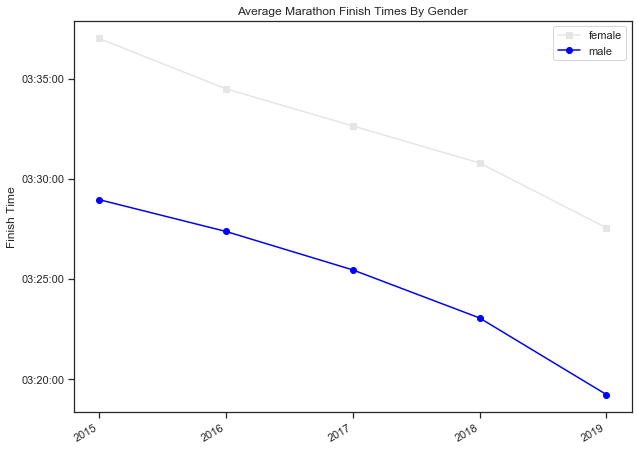

In [365]:
nyc_groupby_gender_female['time'] = nyc_groupby_gender_female['time'].values.astype('datetime64[ns]')
nyc_groupby_gender_male['time'] = nyc_groupby_gender_male['time'].values.astype('datetime64[ns]')

fig, ax = plt.subplots(figsize=(10,8))

myFmt = DateFormatter("%H:%M:%S")
ax.yaxis.set_major_formatter(myFmt)

ax.plot(nyc_groupby_gender_female['year'], nyc_groupby_gender_female['time'],color='#e5e5e5',label='female',marker='s')
ax.plot(nyc_groupby_gender_male['year'], nyc_groupby_gender_male['time'],color='blue',label='male',marker='o')


plt.gcf().autofmt_xdate()

plt.title('Average Marathon Finish Times By Gender', fontdict=None, loc='center')
plt.ylabel('Finish Time')
plt.legend();
plt.show()

Colors from website
  -  border-color: #e5e5e5;
  -  color: #191919;
  -  #0b0080, color: #0645ad
  -  background-color: #fff;

In [366]:
#4:59 PACE IS NOT CONVERTING TO INT
nyc_races['pace'] = nyc_races['pace'].astype('float').astype('int')
#nyc_groupby_age_pace = nyc_races.groupby(['year','gender','age_group']).pace.mean().astype('timedelta64[ns]')
#nyc_groupby_age_pace


ValueError: could not convert string to float: '04:59'

In [367]:
try:
  int(nyc_races['pace'])
except:
  print('Can not convert', nyc_races['pace'] ,"to int")

Can not convert 0       04:59
1       05:00
2       05:03
3       05:04
4       05:06
        ...  
9995    08:35
9996    08:35
9997    08:35
9998    08:35
9999    08:35
Name: pace, Length: 50000, dtype: object to int


# Age Group Dataframe - Average Finish Times

In [368]:
#convert age_group from category to string in order to group by, 'time' has to be astype('int64') before mean is called
nyc_races['age_group'] = nyc_races['age_group'].astype(str)
nyc_groupby_age = nyc_races.groupby(['year','gender','age_group']).time.mean().astype('timedelta64[ns]').to_frame().reset_index()#.astype(np.int64).mean()
nyc_groupby_age

,year,gender,age_group,time
0,2015,F,10-19,03:42:21.800000
1,2015,F,20-29,03:35:55.349549
2,2015,F,30-39,03:36:04.758782
3,2015,F,40-49,03:37:39.066165
4,2015,F,50-59,03:41:22.323671
...,...,...,...,...
61,2019,M,30-39,03:16:41.760312
62,2019,M,40-49,03:20:18.511609
63,2019,M,50-59,03:24:47.160162
64,2019,M,60-69,03:30:23.329268


In [369]:
nyc_groupby_age_bucket = nyc_groupby_age.drop(columns ='year')
nyc_groupby_age_bucket['time'] = nyc_groupby_age_bucket['time'].astype('int64')
nyc_groupby_age_bucket = nyc_groupby_age_bucket.groupby(['age_group','gender']).time.mean().astype('timedelta64[ns]').to_frame().reset_index()
nyc_groupby_age_bucket

,age_group,gender,time
0,10-19,F,03:35:12.760000
1,10-19,M,03:23:20.730093
2,20-29,F,03:31:00.265201
3,20-29,M,03:21:09.770233
4,30-39,F,03:30:47.053758
5,30-39,M,03:22:37.817610
6,40-49,F,03:34:19.380331
7,40-49,M,03:25:41.344936
8,50-59,F,03:38:03.379607
9,50-59,M,03:29:55.168586


In [370]:
nyc_groupby_age_female = nyc_groupby_age_bucket.loc[(nyc_groupby_age_bucket['gender'] == 'F')].reset_index()
nyc_groupby_age_male = nyc_groupby_age_bucket.loc[(nyc_groupby_age_bucket['gender'] == 'M')].reset_index()

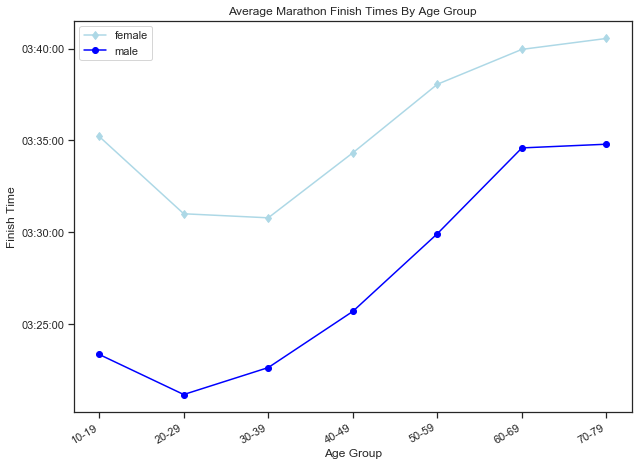

In [371]:
#WANT TO MAKE THIS A BAR GRAPH
nyc_groupby_age_female['time'] = nyc_groupby_age_female['time'].values.astype('datetime64[ns]')
nyc_groupby_age_male['time'] = nyc_groupby_age_male['time'].values.astype('datetime64[ns]')

fig, ax = plt.subplots(figsize=(10,8))

myFmt = DateFormatter("%H:%M:%S")
ax.yaxis.set_major_formatter(myFmt)


ax.plot(nyc_groupby_age_female['age_group'], nyc_groupby_age_female['time'],color='lightblue',label = 'female',marker='d')
ax.plot(nyc_groupby_age_male['age_group'], nyc_groupby_age_male['time'],color='blue',label='male',marker='o')

plt.gcf().autofmt_xdate()

plt.title('Average Marathon Finish Times By Age Group', fontdict=None, loc='center')
plt.ylabel('Finish Time')
plt.xlabel('Age Group')
plt.legend();
plt.show()

In [ ]:
#boxplots by gender across years (cleveland box plots?)
#average pace per age group chart 

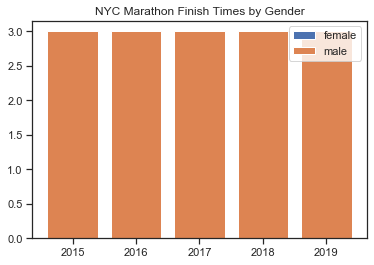

In [375]:
#this is not graphing time on y-axis
x =['2015','2016','2017','2018','2019']
labels = ['female','male']
plt.bar(x, height=3, width=0.8, align='center', data=nyc_groupby_age_female)
plt.bar(x, height=3, width=0.8, align='center', data=nyc_groupby_age_male)
plt.title('NYC Marathon Finish Times by Gender')
plt.legend(labels,loc='best');